In [157]:
import pandas as pd
import pygwalker as pyg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [51]:
data = "https://raw.githubusercontent.com/CPHRasmusOlsson/BusinessIntelligence/refs/heads/main/MiniProj4/high_diamond_ranked_10min.csv"
df = pd.read_csv(data)

In [52]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [55]:
corr_mat = df.corr()
bluewincorr = corr_mat[['blueWins']].drop('gameId')

In [57]:
print(bluewincorr)

                              blueWins
blueWins                      1.000000
blueWardsPlaced               0.000087
blueWardsDestroyed            0.044247
blueFirstBlood                0.201769
blueKills                     0.337358
blueDeaths                   -0.339297
blueAssists                   0.276685
blueEliteMonsters             0.221944
blueDragons                   0.213768
blueHeralds                   0.092385
blueTowersDestroyed           0.115566
blueTotalGold                 0.417213
blueAvgLevel                  0.357820
blueTotalExperience           0.396141
blueTotalMinionsKilled        0.224909
blueTotalJungleMinionsKilled  0.131445
blueGoldDiff                  0.511119
blueExperienceDiff            0.489558
blueCSPerMin                  0.224909
blueGoldPerMin                0.417213
redWardsPlaced               -0.023671
redWardsDestroyed            -0.055400
redFirstBlood                -0.201769
redKills                     -0.339297
redDeaths                

In [59]:
##dropping tables based on low correlation
columns_to_drop = corr_mat[corr_mat['blueWins'].abs() < 0.2].index.tolist()

In [61]:
if 'blueWin' in columns_to_drop:
    columns_to_drop.remove('blueWin')

In [63]:
df_dropped = df.drop(columns=columns_to_drop)

In [65]:
df_dropped.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueAvgLevel,blueTotalExperience,...,redEliteMonsters,redDragons,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,1,9,6,11,0,0,17210,6.6,17039,...,0,0,16567,6.8,17047,197,-643,8,19.7,1656.7
1,0,0,5,5,5,0,0,14712,6.6,16265,...,2,1,17620,6.8,17438,240,2908,1173,24.0,1762.0
2,0,0,7,11,4,1,1,16113,6.4,16221,...,0,0,17285,6.8,17254,203,1172,1033,20.3,1728.5
3,0,0,4,5,5,1,0,15157,7.0,17954,...,0,0,16478,7.0,17961,235,1321,7,23.5,1647.8
4,0,0,6,6,6,0,0,16400,7.0,18543,...,1,1,17404,7.0,18313,225,1004,-230,22.5,1740.4


<Axes: >

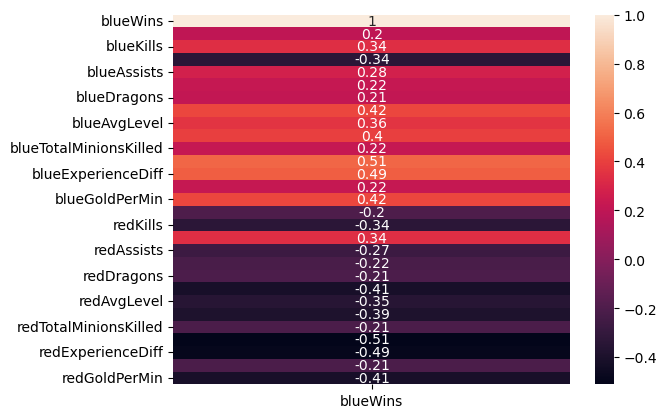

In [67]:
corr_mat_dropped = df_dropped.corr()
blueWin_corr_drop = corr_mat_dropped[['blueWins']]
sns.heatmap(blueWin_corr_drop,annot=True)

In [69]:
X= df_dropped.drop('blueWins', axis=1)
y= df_dropped['blueWins']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred_dt = dt_model.predict(X_test)

In [85]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       983
           1       0.64      0.64      0.64       993

    accuracy                           0.64      1976
   macro avg       0.64      0.64      0.64      1976
weighted avg       0.64      0.64      0.64      1976



In [81]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
[[618 365]
 [353 640]]


In [95]:
nb_model = GaussianNB()

In [97]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [99]:
y_pred_nb = nb_model.predict(X_test)

In [101]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



In [103]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[715 268]
 [266 727]]


In [117]:
preprocessor = StandardScaler()

In [119]:
df_processed = preprocessor.fit_transform(df_dropped)

In [161]:
silhouette_scores = []
cluster_range = range(2,15)

In [163]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_processed)

    silhouette_avg = silhouette_score(df_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is: 0.22167274419699468
For n_clusters = 3, the average silhouette_score is: 0.15175857845699
For n_clusters = 4, the average silhouette_score is: 0.14714778710081589
For n_clusters = 5, the average silhouette_score is: 0.1224223034445236
For n_clusters = 6, the average silhouette_score is: 0.11903572560621155
For n_clusters = 7, the average silhouette_score is: 0.1121674218197425
For n_clusters = 8, the average silhouette_score is: 0.1095944199594151
For n_clusters = 9, the average silhouette_score is: 0.10722179671957831
For n_clusters = 10, the average silhouette_score is: 0.10284390347939677
For n_clusters = 11, the average silhouette_score is: 0.10051323954160277
For n_clusters = 12, the average silhouette_score is: 0.10218236144233153
For n_clusters = 13, the average silhouette_score is: 0.10204042100510353
For n_clusters = 14, the average silhouette_score is: 0.0966827383425109


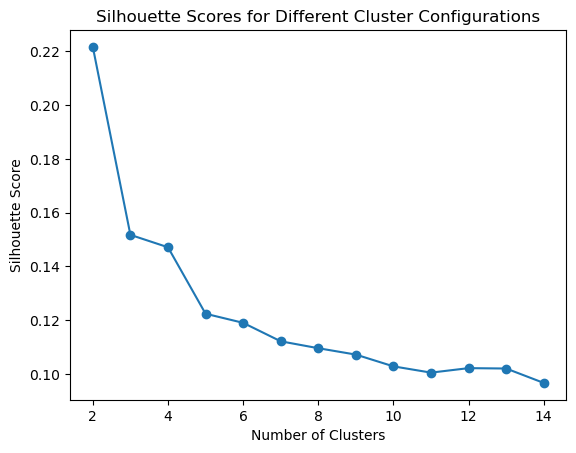

In [164]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Configurations")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [177]:
best_score = max(silhouette_scores)
best_n_clusters = cluster_range[silhouette_scores.index(best_score)]

print(f"The best silhouette score is {best_score} for {best_n_clusters} clusters.")

The best silhouette score is 0.22167274419699468 for 2 clusters.


In [179]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_processed)

In [181]:
best_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_processed)

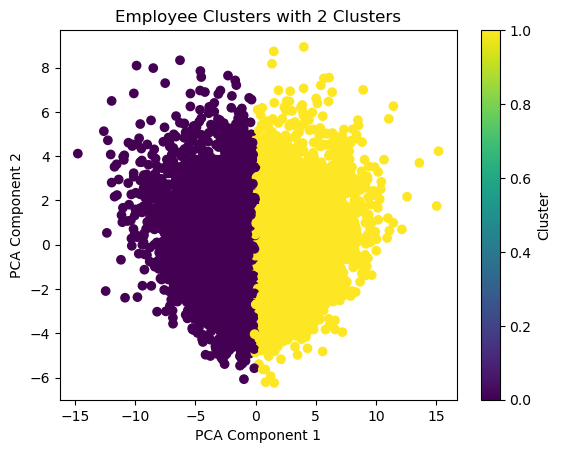

In [183]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f"Employee Clusters with {best_n_clusters} Clusters")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()